In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [3]:
path_csv = "../datasets/heart_disease.csv"

In [47]:
df = pd.read_csv(path_csv)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [61]:
print("Shape: ",df.shape)
print("Column data types:\n",df.dtypes)
col = df[['sex','dataset','cp','fbs','restecg','exang','slope','thal']]
for column in col.columns:
    print(f"Categorical variable: '{column}' con {col[column].nunique()} unique values")
for column in df.columns:
    print(f"Missing values in '{column}': {df[column].isnull().sum()}")

Shape:  (920, 16)
Column data types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
Categorical variable: 'sex' con 2 unique values
Categorical variable: 'dataset' con 4 unique values
Categorical variable: 'cp' con 4 unique values
Categorical variable: 'fbs' con 2 unique values
Categorical variable: 'restecg' con 3 unique values
Categorical variable: 'exang' con 2 unique values
Categorical variable: 'slope' con 3 unique values
Categorical variable: 'thal' con 3 unique values
Missing values in 'id': 0
Missing values in 'age': 0
Missing values in 'sex': 0
Missing values in 'dataset': 0
Missing values in 'cp': 0
Missing values in 'trestbps': 59
Missing values in 'chol': 30
Missing values in 'fbs': 90
Missi

In [63]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

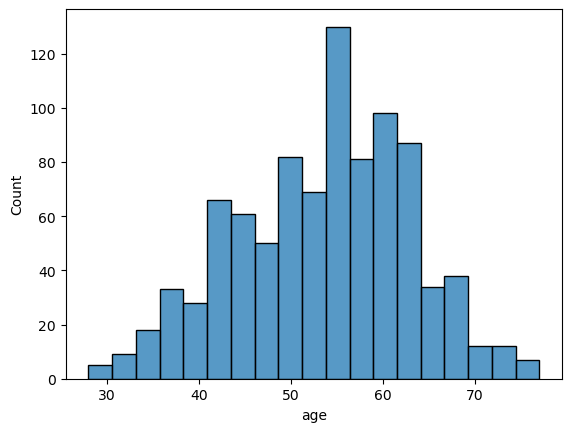

In [69]:
sns.histplot(df['age'])

In [71]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

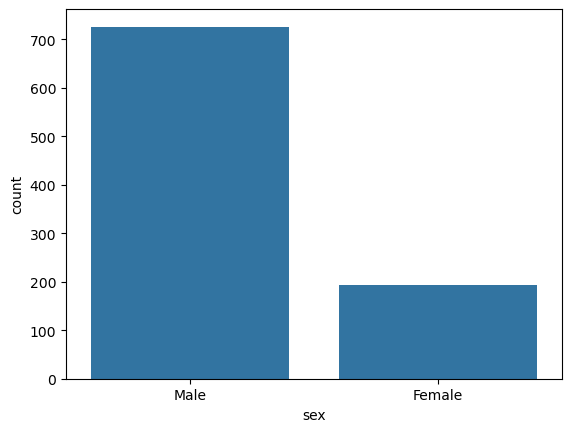

In [72]:
sns.countplot(x='sex', data=df)